In [1]:
# import stuff
%load_ext autoreload
%autoreload 2
%matplotlib inline

from random import randint
import matplotlib

import numpy as np
import torch

GLOVE_PATH = '../dataset/GloVe/glove.840B.300d.txt'

## Load model

In [2]:
# make sure models.py is in the working directory
#model = torch.load('infersent.allnli.pickle')

AssertionError: 
Found no NVIDIA driver on your system. Please check that you
have an NVIDIA GPU and installed a driver from
http://www.nvidia.com/Download/index.aspx

In [2]:
# torch.load(..pickle) will use GPU/Cuda by default. If you are on CPU:
model = torch.load('infersent.allnli.pickle', map_location=lambda storage, loc: storage)
# On CPU, setting the right number of threads with "torch.set_num_threads(k)" may improve performance

In [3]:
model.set_glove_path(GLOVE_PATH)

In [4]:
model.build_vocab_k_words(K=100000)

Vocab size : 100000


## Load sentences

In [5]:
# Load some sentences
sentences = []
with open('text_0_AutomotiveProd1.txt') as f:
    for line in f:
        sentences.append(line.strip())
print(len(sentences))

150


In [6]:
sentences[:5]

['I bought these cables to o in the trunk of my new car because I believe in being prepared. They are basic medium duty cables I own many sets like these and they get the job done. These will last for years I believe with occasional use.',
 'I have one set of these cables in all of my cars and have used them.  The length is enough to jump start the car, even if the other car is behind you.',
 "I needed a set of jumper cables for my new car and these had good reviews and were at a good price.  They have been used a few times already and do what they are supposed to - no complaints there.What I will say is that 12 feet really isn't an ideal length.  Sure, if you pull up front bumper to front bumper they are plenty long, but a lot of times you will be beside another car or can't get really close.  Because of this, I would recommend something a little longer than 12'.Great brand - get 16' version though.",
 "I bought these several months ago before the winter hit full force in Wisconsin.  

## Encode sentences

In [7]:
# gpu mode : ~1000 sentences/s
# cpu mode : ~75 sentences/s

In [8]:
embeddings = model.encode(sentences, bsize=128, tokenize=False, verbose=True)
print('nb sentences encoded : {0}'.format(len(embeddings)))

Nb words kept : 9577/10952 (87.45 %)
Speed : 5.29 sentences/s (cpu mode, bsize=128)
nb sentences encoded : 150


In [12]:
print(type(embeddings))
print(embeddings[0])

<class 'numpy.ndarray'>
[ 0.0623891   0.12453147  0.09918956 ...,  0.08231215  0.          0.02761772]


## Visualization

In [24]:
np.linalg.norm(model.encode(['the product is cheap.']))

3.1641479

In [25]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [27]:
cosine(model.encode(['the product is cheap.'])[0], model.encode(['product is not that expensive.'])[0])

0.68753296

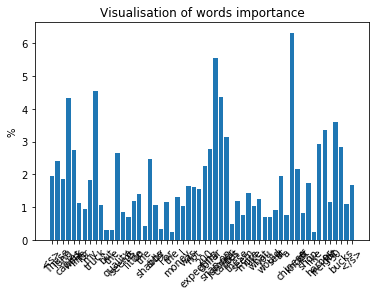

In [28]:
idx = randint(0, len(sentences))
_, _ = model.visualize(sentences[idx])

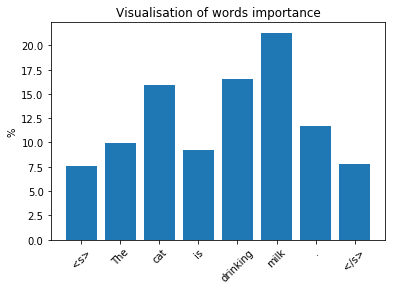

In [15]:
my_sent = 'The cat is drinking milk.'
_, _ = model.visualize(my_sent)

Vocab size : 500000


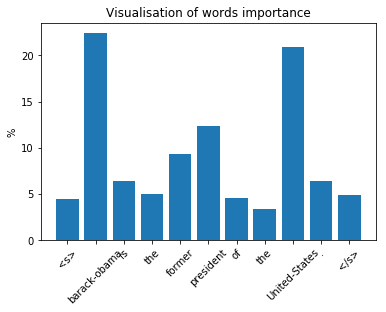

In [16]:
model.build_vocab_k_words(500000) # getting 500K words vocab
my_sent = 'barack-obama is the former president of the United-States.'
_, _ = model.visualize(my_sent)